<a href="https://colab.research.google.com/github/thatadi/Submarine-Rock-vs-Mine/blob/main/Rock_vs_Mine_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import accuracy_score , precision_score

In [ ]:
sonar=pd.read_csv("sonar.csv")
sonar

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [ ]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [ ]:
encoder=LabelEncoder()

In [ ]:
y=encoder.fit_transform(sonar['R'])
X=sonar.drop('R',axis=1)
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

In [ ]:
pred=model.predict(test_x)

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
logistic_accuracy=accuracy_score(test_y,pred)
logistic_precision=precision_score(test_y,pred)
print("Accuracy: ",logistic_accuracy,"Precision: ",logistic_precision)

Accuracy:  0.7307692307692307 Precision:  0.6296296296296297


# XG Boost

In [ ]:
model=xgb.XGBClassifier(
    n_estimators=100, max_depth=2, learning_rate=0.1,colsample_bytree=1.0)

In [ ]:
model.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred=model.predict(test_x)

In [ ]:
xg_accuracy=accuracy_score(test_y,pred)
xg_precision=precision_score(test_y,pred)
print("Accuracy: ",xg_accuracy,"Precision: ",xg_precision)

Accuracy:  0.8461538461538461 Precision:  0.76


# Random Forest Classifier and Histogrom Based Classifier


In [ ]:
model=RandomForestClassifier(n_estimators=200)


In [ ]:
model_hist=HistGradientBoostingClassifier(
                                       max_iter=200)

In [ ]:
model.fit(train_x,train_y)

RandomForestClassifier(n_estimators=200)

In [ ]:
model_hist.fit(train_x,train_y)

HistGradientBoostingClassifier(max_iter=200)

In [ ]:
pred=model.predict(test_x)

In [ ]:
pred_hist=model_hist.fit(train_x,train_y)

In [ ]:
rf_accuracy=accuracy_score(test_y,pred)
rf_precision=precision_score(test_y,pred)
print("Accuracy: ",rf_accuracy,"Precision: ",rf_precision)

Accuracy:  0.8076923076923077 Precision:  0.7619047619047619


In [ ]:
score=model_hist.score(test_x,test_y)
score

0.7884615384615384

# Neural Network Classifier

In [ ]:
scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.fit_transform(test_x)

In [207]:
classifier=Sequential()
classifier.add(Dense(units=16,activation="sigmoid",input_dim=60))
classifier.add(Dense(units=8,activation="sigmoid"))
classifier.add(Dense(units=1,activation="sigmoid"))

In [208]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [209]:
classifier.fit(train_x,train_y,batch_size=1,epochs=100)

Epoch 1/100
155/155 [==============================] - 1s 2ms/step - loss: 0.6744 - accuracy: 0.6000
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.7355
Epoch 3/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7484
Epoch 4/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7871
Epoch 5/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.8194
Epoch 6/100
155/155 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8065
Epoch 7/100
155/155 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8387
Epoch 8/100
155/155 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8387
Epoch 9/100
155/155 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8581
Epoch 10/100
155/155 [==============================] - 0s 2ms/step - loss: 0.3848 - accura

In [210]:
pred=list(classifier.predict(test_x))
pred_list=[]
for i in pred:
  if i>=0.5:
    pred_list.append(1)
  else:
    pred_list.append(0)


2/2 [==============================] - 0s 4ms/step


In [217]:
nn_accuracy=accuracy_score(test_y,pred_list)

In [218]:
nn_precision=precision_score(test_y,pred_list)

In [219]:
accuracy=[logistic_accuracy,xg_accuracy,rf_accuracy,nn_accuracy ]
precision=[logistic_precision ,xg_precision, rf_precision, nn_precision]
x=['Logistic Regression','Xg Boost','Random Forest','Neural Network']

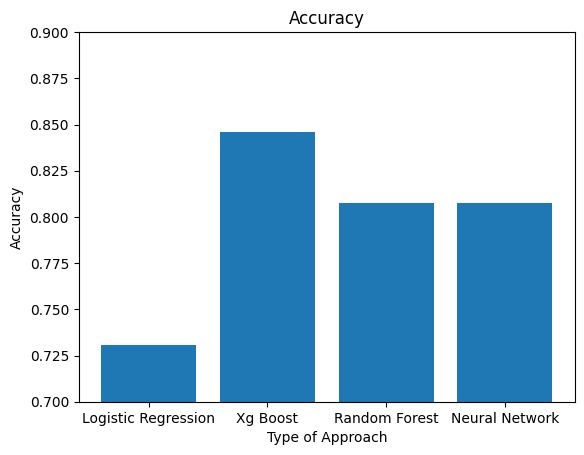

In [222]:
plt.bar(x,accuracy)
plt.xlabel('Type of Approach')
plt.ylabel('Accuracy')
plt.ylim(0.7,0.9)
plt.title("Accuracy")
plt.show()